Importing The Dependencies

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,recall_score
from sklearn.preprocessing import StandardScaler

Import Bostone House Prediction Database

In [177]:
house_price_dataset = pd.read_csv('Housing.csv')

In [178]:
print(house_price_dataset)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [179]:
# check for missing values
house_price_dataset.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [180]:
# Statistical measure of Data
house_price_dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [181]:
house_price_dataframe = pd.DataFrame(house_price_dataset)
type(house_price_dataframe)

pandas.core.frame.DataFrame

In [182]:
house_price_dataframe.replace({"mainroad":{'yes':1,'no':0}},inplace=True)
house_price_dataframe.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished


In [183]:
house_price_dataframe.replace({"guestroom":{'yes':1,'no':0}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,no,furnished


In [184]:
house_price_dataframe.replace({"basement":{'yes':1,'no':0}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,furnished


In [185]:
house_price_dataframe.replace({"hotwaterheating":{'yes':1,'no':0}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,yes,2,no,furnished


In [186]:
house_price_dataframe.replace({"airconditioning":{'yes':1,'no':0}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,furnished


In [187]:
house_price_dataframe.replace({"prefarea":{'yes':1,'no':0}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [188]:
house_price_dataframe.replace({"furnishingstatus":{'furnished':0,'semi-furnished':1,'unfurnished':2}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [189]:
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


Scalling Data

In [190]:

# scaler = StandardScaler()

# # Scale only the numerical columns
# house_price_dataset = scaler.fit_transform(house_price_dataset)

# house_price_dataframe = pd.DataFrame(house_price_dataset)
# # house_price_dataframe.head(5)

Understanding the co relation of various features in dataset

1. Positive Corelation
2. Negative Corelation

In [191]:
corelation = house_price_dataframe.corr()

<Axes: >

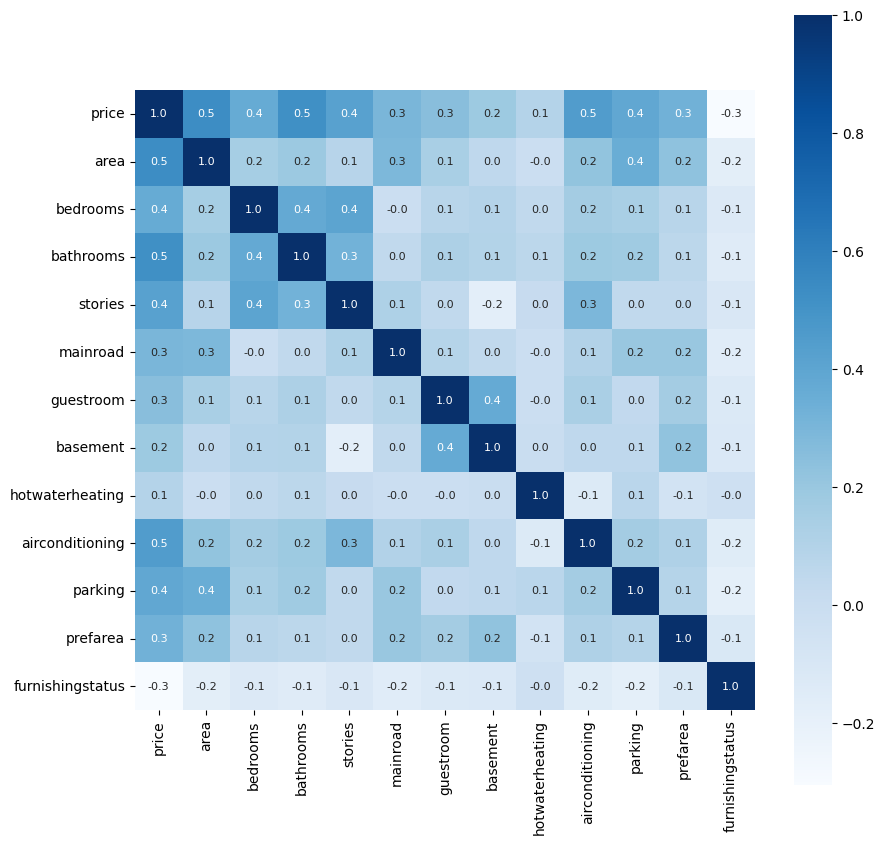

In [192]:
# constructing heat map to understanding the corelation
plt.figure(figsize=(10,10))
sns.heatmap(corelation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Spliting the data and target

In [193]:
X = house_price_dataframe.drop(['price'],axis=True)
Y = house_price_dataframe['price']

In [194]:
print(X)
print(Y)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

Splitting the data into Training data and Test data

In [207]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [208]:
print(X.shape,X_train.shape,X_test.shape)

(545, 12) (490, 12) (55, 12)


Model Train

XGBoost Regressor

In [209]:
# Loading the Model
model =  XGBRegressor()

In [210]:
# Training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [211]:
# accuracy on Training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[ 5587877.5  8822271.   4674811.5  2178144.2  3964790.8  3150450.
  3589998.2  4064963.2  7268412.5  8407223.   4771604.5  4291896.5
  5005794.5  3254969.   4121914.5  4941800.   5185348.5  6088392.
  5975288.   8643987.   3273499.5  5460274.5  4629428.  10139406.
  6054340.   6147471.   4538957.   4250030.5  2448049.   3442354.5
  3668722.5  8522440.   7964167.   4709108.5  4968237.5  4189406.8
  4695806.5  4637730.5  6439262.   4906168.   8542519.   9287730.
  4782101.5  4736282.5  3326543.2  8255886.5  3975003.5  6696418.
  3734768.2  6221041.5  3855799.5  5234930.5  4612124.   8805757.
  3437123.8  4197649.5  2669852.8  4755133.5  4094844.   6830083.
  2956690.   2642479.   6916680.5  4661679.5  3343716.8  2920401.5
  6032199.   5761372.   7744021.5  4172120.2  5243402.   4479671.
  7808774.   4203244.5  4151888.8  2363426.5  5247396.5  4387540.5
  3937428.2  4017399.8  6786100.   9195672.   4478109.5  3247318.8
  3785747.5  3108146.8  2392522.5  4210582.   4232834.5  2887461.5
  4

In [212]:
# R Square error
score_1 = metrics.r2_score(Y_train,training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R Squared error : ",score_1)
print("Mean Absolute error : ",score_2)

R Squared error :  0.9960851666430784
Mean Absolute error :  70379.02933673469


Visual the actual and predicted prices

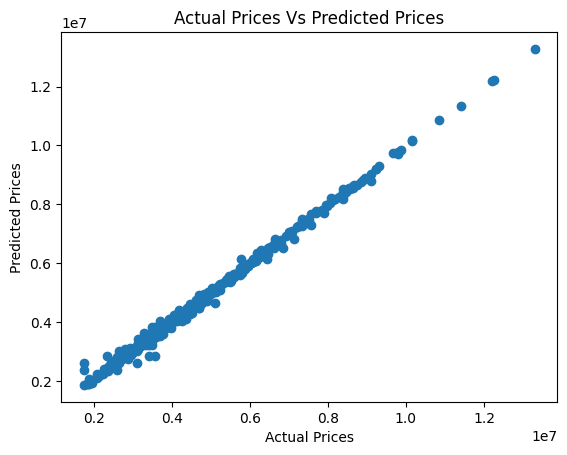

In [213]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

Prediction On Test Data

In [214]:
# accuracy on Test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[3254849.5 5708094.  3800478.5 4188614.8 5921353.  4060416.2 4858102.5
 2682108.2 2505135.8 4350788.  2868700.5 2792579.8 3185503.8 5088450.
 5832881.  6071575.5 6938988.  4856866.  3507183.8 4672320.5 5090294.5
 4047495.2 4318601.5 6070359.  2217385.5 3172103.8 3131201.  4521065.
 4682894.  2348397.8 4210565.  3490041.  3751280.2 4411194.  3315860.8
 9115488.  2899821.8 7972291.  5908097.5 2740589.5 5981179.5 3075529.8
 3175219.5 3938619.8 2685148.8 4080860.8 1996820.6 3927222.2 4201161.
 6292987.5 6409497.5 5990352.  2633075.  3131201.  3686488.8]


In [215]:
# R Square error
score_1 = metrics.r2_score(Y_test,test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R Squared error : ",score_1)
print("Mean Absolute error : ",score_2)

R Squared error :  0.47377224667886786
Mean Absolute error :  847636.3022727272


Test

In [219]:
# Create a DataFrame with the input data
input_data = pd.DataFrame({
    'area': [3850],       # the area
    'bedrooms': [3],       # the number of bedrooms
    'bathrooms': [1],      # the number of bathrooms
    'stories': [2],        # the number of stories
    'mainroad': [1],       # mainroad (1 for yes, o for no)
    'guestroom': [0],      # guestroom (1 for yes, 0 for no)
    'basement': [0],       # basement (1 for yes, 0 for no)
    'hotwaterheating': [0],  # hot water heating (1 for yes, 0 for no)
    'airconditioning': [0],  # air conditioning (1 for yes, 0 for no)
    'parking': [0],          # the number of parking spaces
    'prefarea': [0],         # preferred area (1 for yes, 0 for no)
    'furnishingstatus': [2],  # furnishing status (0 for furnished, 1 for semi-furnished, 2 for unfurnished)
}, columns=house_price_dataframe.columns[1:])


# Make predictions using the trained XGBoost model
input_prediction = model.predict(input_data)

# Print the predicted price
print("Predicted Price:", input_prediction[0])


Predicted Price: 2607771.8
